### Airbnb Price Prediction
- Goal : Predict the price of Airbnb listings in London based on various features like location, room type, number of reviews, etc.

In [16]:
import os
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Extra Settings

In [17]:
# Setting the default size of visualisations.
sns.set(rc={'figure.figsize': (12, 9)})

# Ignoring red warnings
pd.options.mode.chained_assignment = None

In [18]:
data = pd.read_csv('listings.csv')

In [19]:
# ========== Here's the main function for the basic data overview.

def do_basic_overview(data):
    print()
    print(12*'=', 'Basic Info', 12*'=')
    data.info()
    print('\n\n')
    print(12*'=', 'First Five Rows', 12*'=')
    display(data.head())
    print('\n\n')
    print(12*'=', 'Last Five Rows', 12*'=')
    display(data.tail())
    print('\n\n')
    print(12*'=', 'Duplicates', 12*'=')
    print()
    if data.duplicated().sum() > 0:
        print(f'Amount of duplicated rows: {data.duplicated().sum()}.')
        data.drop_duplicates(inplace=True, ignore_index=True)
        print('Duplicated rows were dropped.')
    else:
        print('None.')
        
        
# Creating histograms for all columns with numeric values in search for some obvious anomalies.
def numeric_cols_hist(data, width, height):
        cols = data.select_dtypes(include=('number')).columns.to_list()
        data[cols].hist(bins=30, figsize=(width, height))
        plt.show()
        print('Here, density of values in each numeric column is shown.')

#### Basic overview of the Dataset

In [20]:
do_basic_overview(data)


============ Basic Info ============
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83850 entries, 0 to 83849
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           83850 non-null  int64  
 1   id                              83850 non-null  int64  
 2   name                            83823 non-null  object 
 3   host_id                         83850 non-null  int64  
 4   host_name                       83803 non-null  object 
 5   neighbourhood_group             0 non-null      float64
 6   neighbourhood                   83850 non-null  object 
 7   latitude                        83850 non-null  float64
 8   longitude                       83850 non-null  float64
 9   room_type                       83850 non-null  object 
 10  price                           83850 non-null  int64  
 11  minimum_nights                  83850 non-null  int64  

,index,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,0,13913,Holiday London DB Room Let-on going,54730,Alina,NaN,Islington,51.56802,-0.11121,Private room,65,1,16,2019-06-10,0.15,3,347
1,1,15400,Bright Chelsea Apartment. Chelsea!,60302,Philippa,NaN,Kensington and Chelsea,51.48796,-0.16898,Entire home/apt,100,3,85,2019-05-05,0.73,1,203
2,2,17402,Superb 3-Bed/2 Bath & Wifi: Trendy W1,67564,Liz,NaN,Westminster,51.52098,-0.14002,Entire home/apt,300,3,41,2019-06-19,0.41,14,269
3,3,24328,Battersea bedroom & office w parking shared ga...,41759,Joe,NaN,Wandsworth,51.47298,-0.16376,Entire home/apt,175,30,93,2019-06-08,0.88,1,329
4,4,25023,All-comforts 2-bed flat near Wimbledon tennis,102813,Amanda,NaN,Wandsworth,51.44687,-0.21874,Entire home/apt,65,4,28,2019-06-22,0.69,1,2





============ Last Five Rows ============


,index,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
83845,83845,36583878,7 VH Loft Apartment,90770681,Sara,NaN,Westminster,51.53057,-0.18423,Entire home/apt,100,2,0,NaN,NaN,1,209
83846,83846,36584535,Lambs Passage 1 Bedroom Apartment,47609036,Ben,NaN,Islington,51.52301,-0.08979,Entire home/apt,82,14,0,NaN,NaN,18,35
83847,83847,36585425,1 Bedroom Apartment in Lambs Passage,47609036,Ben,NaN,Islington,51.52301,-0.08979,Entire home/apt,78,21,0,NaN,NaN,18,36
83848,83848,36585645,Lambs Passage 1 Bedroom,47609036,Ben,NaN,Islington,51.52301,-0.08979,Entire home/apt,82,21,0,NaN,NaN,18,36
83849,83849,36585818,1 Bedroom Apartment in Lanterns Court,47609036,Ben,NaN,Tower Hamlets,51.51050,-0.01788,Entire home/apt,72,14,0,NaN,NaN,18,31





============ Duplicates ============

None.


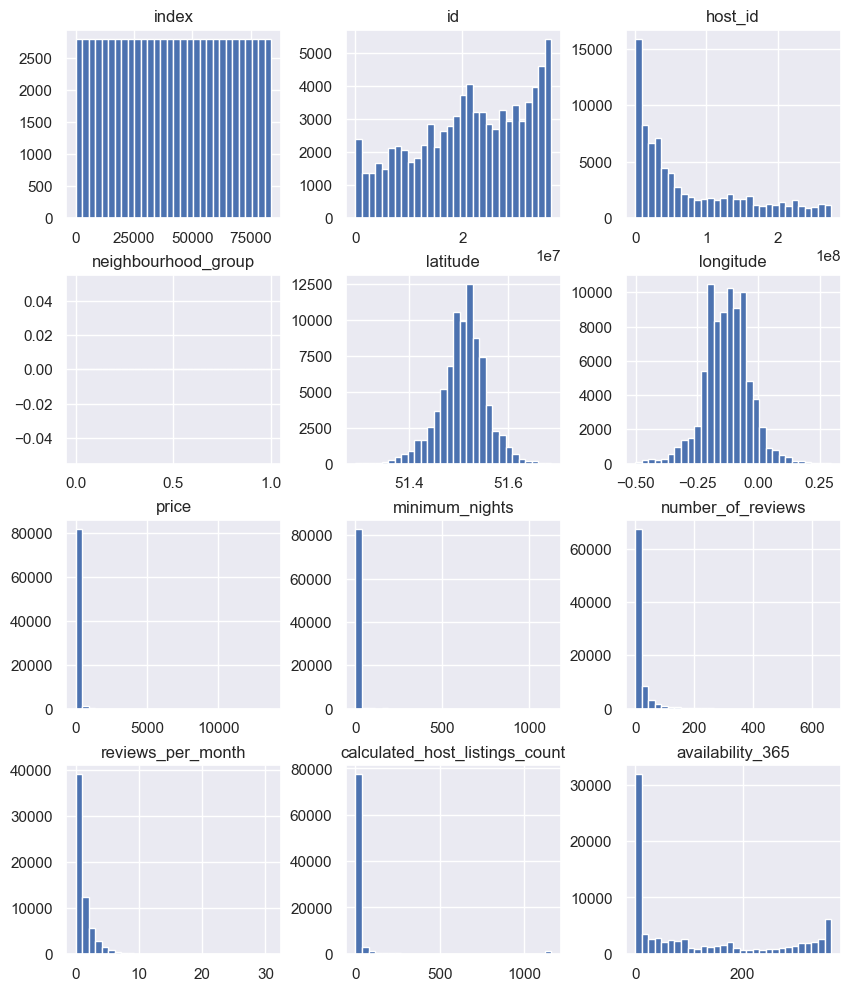

Here, density of values in each numeric column is shown.


In [21]:
numeric_cols_hist(data, width=10, height=12)

In [22]:
data.shape

(83850, 17)

In [47]:
# Check for missing values in the dataset
#airbnb_data.isnull().sum()

data.isnull().sum().sort_values(ascending=False)

last_review                       19729
reviews_per_month                 19729
index                                 0
id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### now we have to impute the missing values in order to make dataset good

In [48]:
# 1. Drop the 'neighborhood' column -> it's fully missing and not useful.
#data.drop(columns=['neighbourhood_group'], inplace=True)

# # 2. Fill missing 'reviews_per_month' with 0 -> it means that there were no reviews.
data['reviews_per_month'].fillna(0)

# 3 Convert 'last_review' to datetime format
data['last_review'] = pd.to_datetime(data['last_review'], errors='coerce')

print('\n\n')
print(12*'=', 'Missing Values After Cleaning', 12*'=')
print()
print(data.isnull().sum().sort_values(ascending=False))






============ Missing Values After Cleaning ============

last_review                       19729
reviews_per_month                 19729
index                                 0
id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [49]:
# Optional: Fill missing last_review with 'No Review'
data['last_review'] = data['last_review'].fillna('No Review')

# Option 1: Drop rows with missing 'name' and 'host_name'
data.dropna(subset=['name', 'host_name'], inplace=True)

# OR Option 2: Just drop the 'host_name' column if you're not using it
# airbnb_data.drop('host_name', axis=1, inplace=True)

In [45]:
print('\n\n')
print(12*'=', 'Missing Values After Cleaning', 12*'=')
print()
print(data.isnull().sum().sort_values(ascending=False))




============ Missing Values After Cleaning ============

reviews_per_month                 19729
index                                 0
id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                           0
calculated_host_listings_count        0
availability_365                      0
dtype: int64


### çhecking for Outliers
- price
- minimum nights
- availability_365
- reviews_per_month

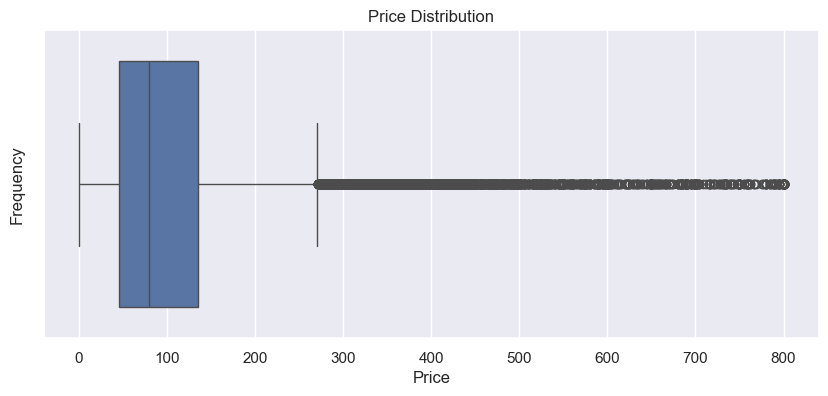

In [50]:
# Box plot for price distribution

plt.figure(figsize=(10, 4))
sns.boxplot(x='price', data=data)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [51]:
# Remove outliers in the 'price' column
data= data[data['price'] <= 800]  # Adjust threshold as needed

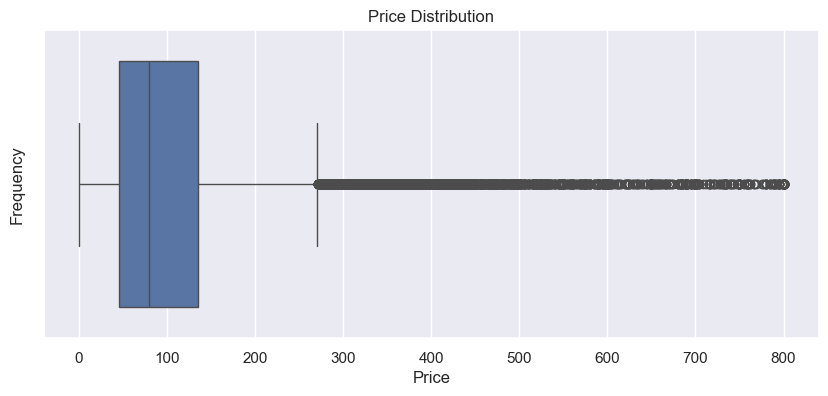

In [52]:
# Recheck the price distribution after removing outlier
plt.figure(figsize=(10, 4))
sns.boxplot(x='price', data=data)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [30]:
data = data[data['minimum_nights'] <= 20]

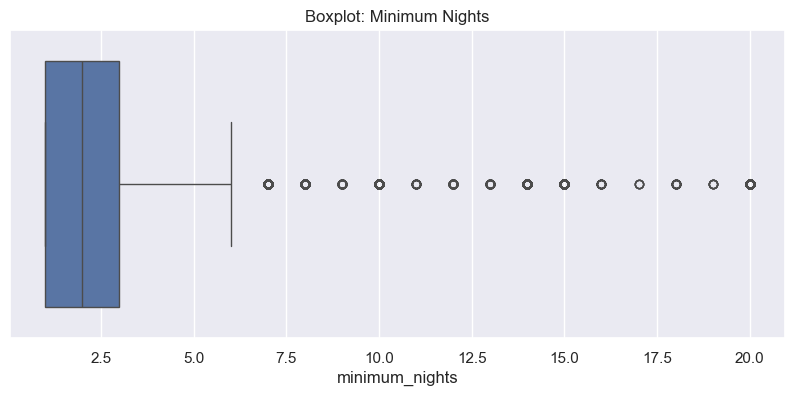

In [31]:
# Boxplot for minimum nights
plt.figure(figsize=(10, 4))
sns.boxplot(x=data['minimum_nights'])
plt.title("Boxplot: Minimum Nights")
plt.show()

###  Save the cleaned Data ( as CSV )

In [32]:
data.to_csv("airbnb_cleaned.csv", index=False)

### Identify different trends across different groups - Like room types or neighbourhoods

In [53]:
room_price = data.groupby('room_type')['price'].mean().sort_values(ascending=False)

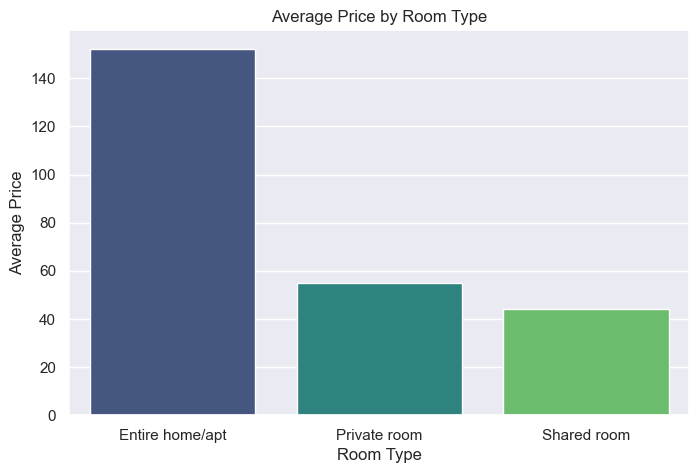

In [54]:
plt.figure(figsize=(8, 5))
sns.barplot(x=room_price.index, y=room_price.values, hue=room_price.index, palette='viridis', legend=False )
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
# plt.xticks(rotation=45)
plt.show()

#### Avg Price by Neighbourhood

In [55]:
neigh_prices = data.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)[:10]

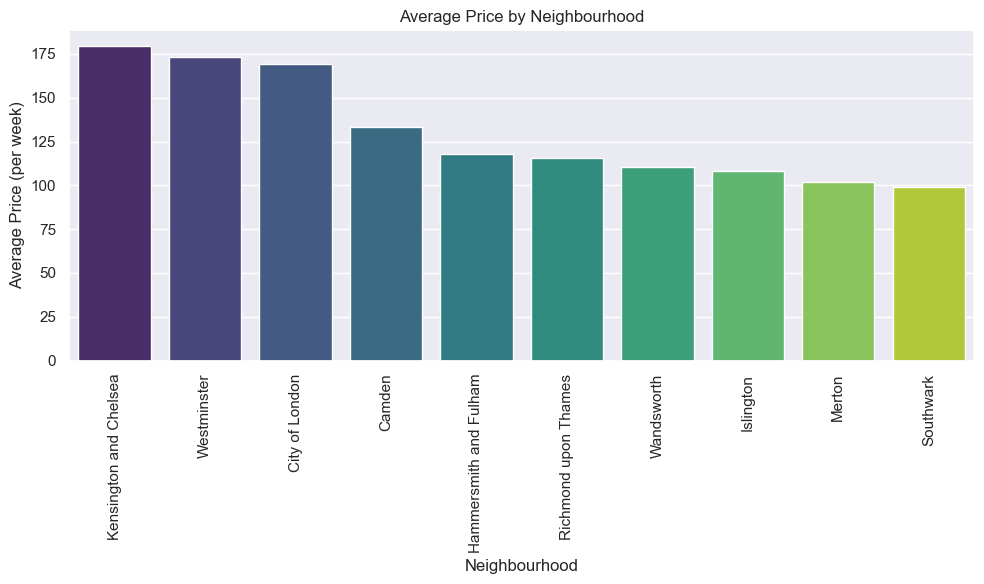

In [58]:
plt.figure(figsize=(10, 6))
sns.barplot(x=neigh_prices.index, y=neigh_prices.values, hue=neigh_prices.index, palette='viridis', legend=False)
plt.title('Average Price by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Average Price (per week)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Correlation Heatmap

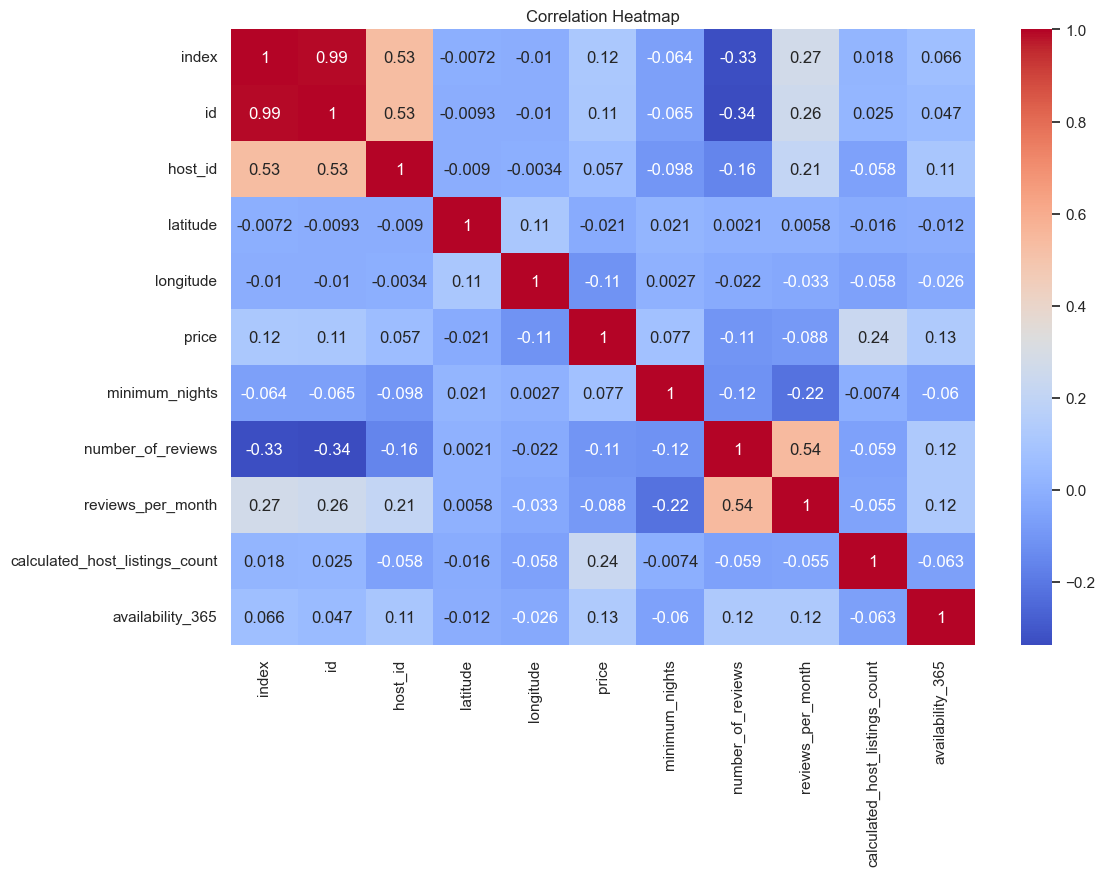

In [57]:
plt.figure(figsize=(12,8))

corr = data.corr(numeric_only=True)
sns.heatmap(corr, annot = True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

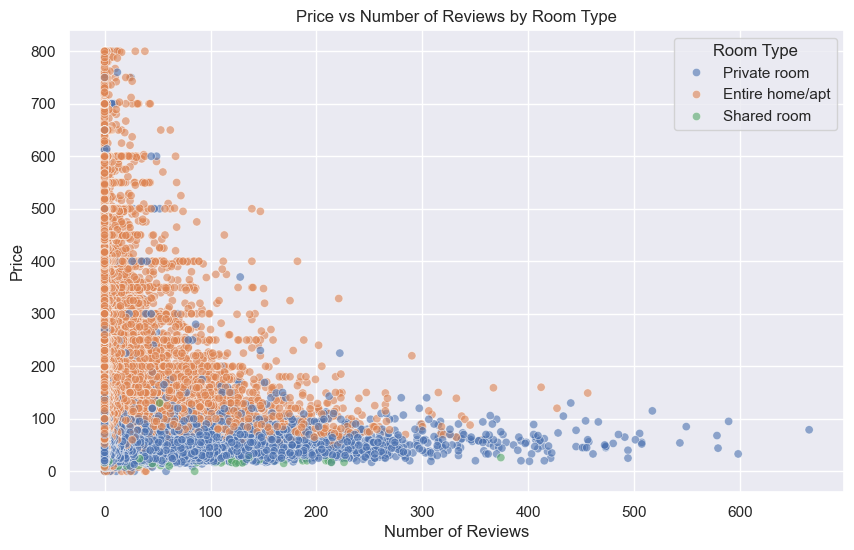

In [59]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='number_of_reviews', y='price', hue='room_type', alpha=0.6)
plt.title('Price vs Number of Reviews by Room Type')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.legend(title='Room Type')
plt.show()

/var/folders/gs/6gjhnpdn0zd0p99jkjwdr0700000gn/T/ipykernel_72905/3182097471.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='room_type', order=data['room_type'].value_counts().index, palette='viridis')


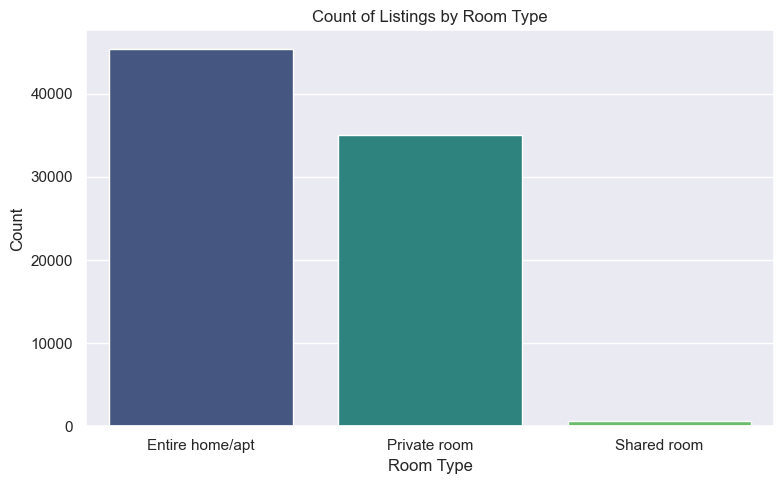

In [60]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='room_type', order=data['room_type'].value_counts().index, palette='viridis')
plt.title('Count of Listings by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Count')
#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()